# <center>Probability and statistics - Winter 2020/21 - Homework</center>
#### <center>Martin Mihalovic - Erazmus student</center>

<br>
<hr />

## Data and parameters
Kedze som v time jediny, automaticky sa teda prehlasujem aj za kapitana timu.
- K = 27
- L = 9 (Mihalovic)
- M = (( K + L ) * 47 ) mod (11) + 1
    - M = 9 + 1 = 10
    
Data set name: **ex0221** <br>
Data set description: **weight based on sparrow survival**
<hr />

**(1pt) Load the data set and separate the data into the two observed parts.  Provide an overview of each of them by estimating the expectation, variance and median of thecorresponding distribution and briefly describing the nature of the studied problem.**
- Prvy moj pokus bol priamo nacitat dataset "ex0221.rda" pomocou pomerne novej kniznice v Pythone **pyreadr**, avsak kvoli zaokruhlovaniu na 6 desatinych miest, som zvolil sposob exportovania dat do formatu ".csv" priamo z kniznice "Sleuth2"

#### Group 1. - Survived Sparrows

In [93]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats.distributions import uniform, expon, norm

dataset = pd.read_csv("dataset.csv", sep=";").values
# print(dataset)

##### Math formulas
    
$$ EX = \sum_{i=1}^{35} \mathrm{x}i P(X=\mathrm{x}i) $$


$$ varX = E(X)^{2} - (EX)^{2}$$


$$ p = \frac{n+1}{2} $$

$$ X\mathrm{n} = X\mathrm{p} $$

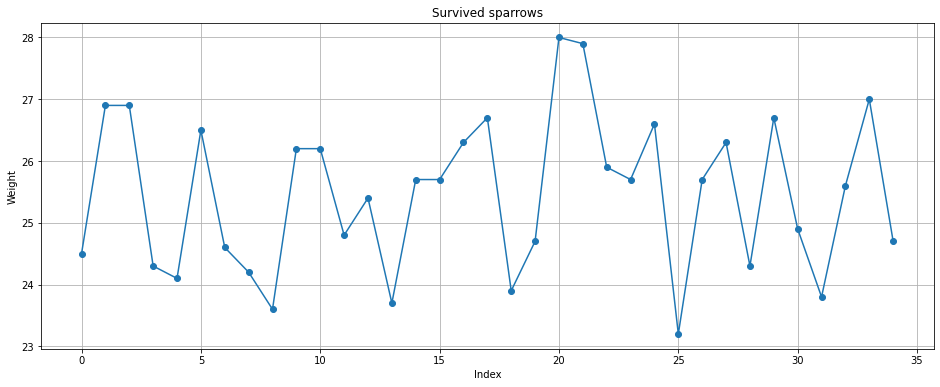

Sorted dataset of survived sparrows:

[23.20000076 23.60000038 23.70000076 23.79999924 23.89999962 24.10000038
 24.20000076 24.29999924 24.29999924 24.5        24.60000038 24.70000076
 24.70000076 24.79999924 24.89999962 25.39999962 25.60000038 25.70000076
 25.70000076 25.70000076 25.70000076 25.89999962 26.20000076 26.20000076
 26.29999924 26.29999924 26.5        26.60000038 26.70000076 26.70000076
 26.89999962 26.89999962 27.         27.89999962 28.        ]


Statistical estimations of survived sparrows:

	- Expectation:  25.462857273646772
	- Variance:     1.5394774582846995
	- Median:       25.7000007629395


In [229]:
survived = np.array([value[0] for value in dataset if value[1] == 'survived'])

plt.figure(figsize=(16,6))
plt.plot(survived, marker = 'o')
plt.grid(True)
plt.title('Survived sparrows')
plt.ylabel('Weight')
plt.xlabel('Index')
plt.show()

survived_exp = np.mean(survived)
survived_var = np.var(survived)
survived_med = np.median(survived)
mu_s         = np.mean(survived)                # mean of distribution
sigma_s      = np.std(survived)                 # standard deviation of distribution
survived_min = math.floor(survived.min())
survived_max = math.ceil(survived.max())
bins_s       = np.linspace(survived_min, survived_max, 7)

print("Sorted dataset of survived sparrows:\n")
print(np.sort(survived))
print("\n\nStatistical estimations of survived sparrows:\n")
print("\t- Expectation: ", survived_exp)
print("\t- Variance:    ", survived_var)
print("\t- Median:      ", survived_med)



#### Group 2. - Perished Sparrows

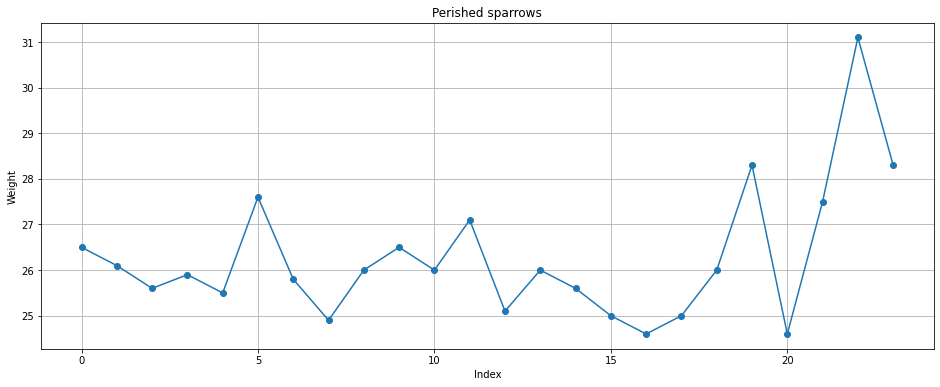

26.27500001589456
26.27500001589456
Sorted dataset of perished sparrows:

[24.60000038 24.60000038 24.89999962 25.         25.         25.10000038
 25.5        25.60000038 25.60000038 25.79999924 25.89999962 26.
 26.         26.         26.         26.10000038 26.5        26.5
 27.10000038 27.5        27.60000038 28.29999924 28.29999924 31.10000038]


Statistical estimations of perished sparrows:

	- Expectation:  26.27500001589456
	- Variance:     2.077708191077034
	- Median:       26.0


In [328]:
perished = np.array([value[0] for value in dataset if value[1] == 'perished'])

plt.figure(figsize=(16,6))
plt.plot(perished, marker = 'o')
plt.grid(True)
plt.title('Perished sparrows')
plt.ylabel('Weight')
plt.xlabel('Index')
plt.show()

perished_exp = np.mean(perished)
perished_var = np.var(perished)
perished_med = np.median(perished)
mu_p         = np.mean(perished)                # mean of distribution
sigma_p      = np.std(perished)                 # standard deviation of distribution
perished_min = math.floor(perished.min())
perished_max = math.ceil(perished.max())
bins_p       = np.linspace(perished_min, perished_max, 9)


print("Sorted dataset of perished sparrows:\n")
print(np.sort(perished))
print("\n\nStatistical estimations of perished sparrows:\n")
print("\t- Expectation: ", perished_exp)
print("\t- Variance:    ", perished_var)
print("\t- Median:      ", perished_med)

### 1. Summary

| State | Size of Dataset | Expectation | Variance | Median |
|---:|:-------------|:-----------|:------|:------|
| Survived | 35 | 25.462857273646772 | 1.5394774582846995 | 25.7000007629395 |
| Perished | 24 | 26.27500001589456 | 2.077708191077034 | 26.0 |

<hr \>


**2)  (1pt) For each group separately, estimate the density and distribution function of the data using the histogram and the empirical distribution function.**

#### Group 1. - Survived Sparrows
My first argument in linspace function was number 10, because from the first graph point of view, looks like best. But in ECDF the best fit has number 7 as number of groups.

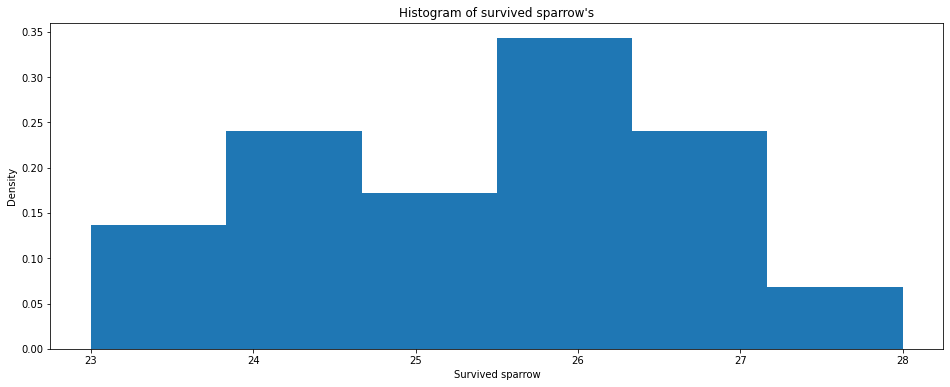

In [227]:
# linspace() -> Return evenly spaced numbers over a specified interval.[1] 
plt.figure(figsize=(16,6))
plt.title("Histogram of survived sparrow's")
plt.ylabel('Density')
plt.xlabel('Survived sparrow')

n, bins, patches = plt.hist(survived, bins_s, density=1)

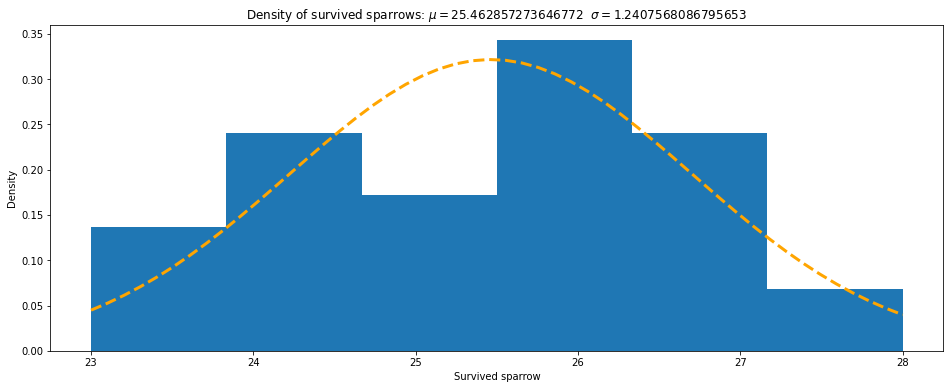

In [300]:
density_x_s = np.linspace(survived_min, survived_max)

plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(survived, bins_s, density=1)
plt.plot(density_x_s, norm.pdf(density_x_s, loc=mu_s, scale=sigma_s), '--', linewidth=3, color='orange')

plt.title("Density of survived sparrows: $\mu= $" + str(mu_s) +"  $\sigma= $" + str(sigma_s))
plt.ylabel('Density')
plt.xlabel('Survived sparrow')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

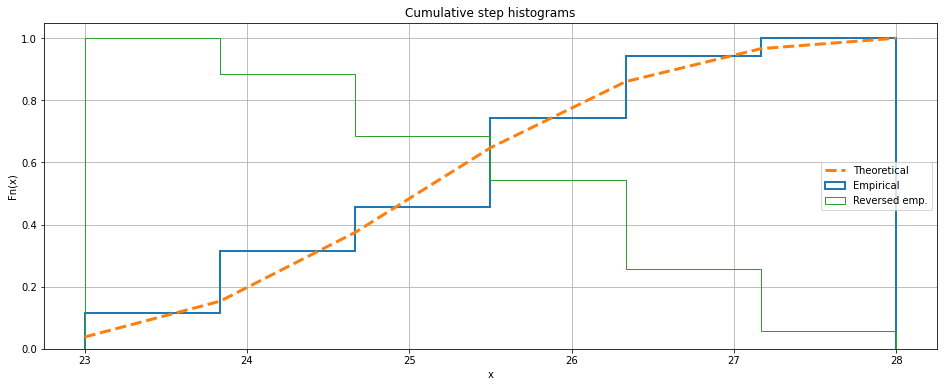

In [225]:
fig, ax = plt.subplots(figsize=(16, 6))

# plot the cumulative histogram
n, bins, patches = ax.hist(survived, bins_s,linewidth=2, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma_s)) *
     np.exp(-0.5 * (1 / sigma_s * (bins - mu_s))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, '--', linewidth=3, label='Theoretical')

# # Overlay a reversed cumulative histogram.
ax.hist(survived, bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('x')
ax.set_ylabel('Fn(x)')

plt.show()



#### Group 2. - Perished Sparrows


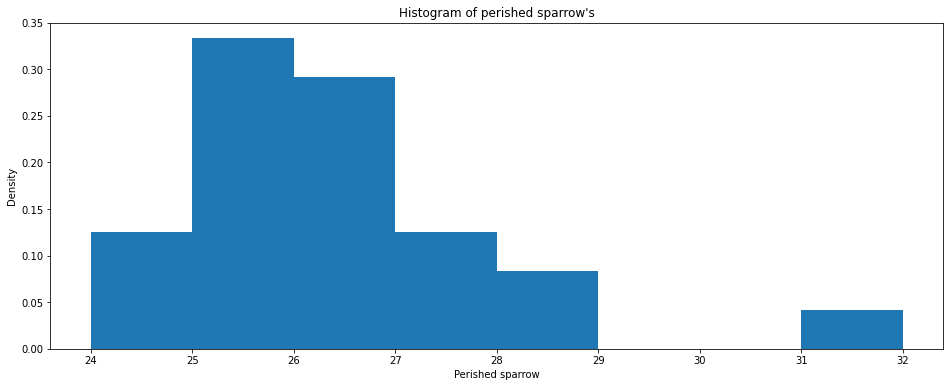

In [224]:
# linspace() -> Return evenly spaced numbers over a specified interval.[1] 
plt.figure(figsize=(16,6))
plt.title("Histogram of perished sparrow's")
plt.ylabel('Density')
plt.xlabel('Perished sparrow')

n, bins, patches = plt.hist(perished, bins_p, density=1)

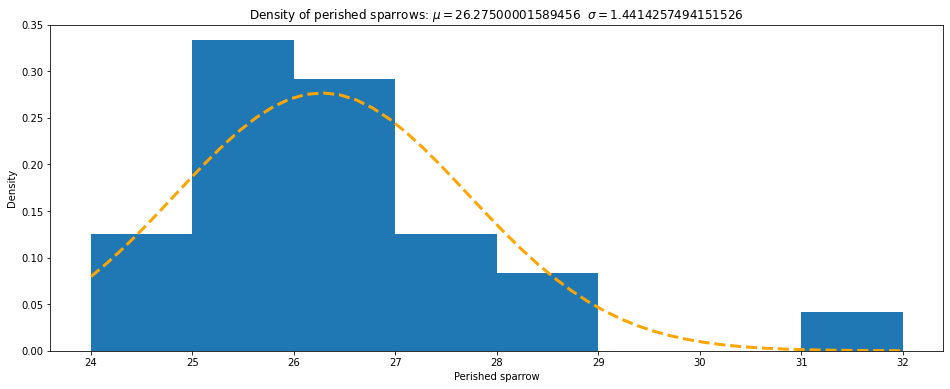

In [301]:
density_x_p = np.linspace(perished_min, perished_max)

plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(perished, bins_p, density=1)
plt.plot(density_x_p, norm.pdf(density_x_p, loc=mu_p, scale=sigma_p), '--', linewidth=3, color='orange')

plt.title("Density of perished sparrows: $\mu= $" + str(mu_p) +"  $\sigma= $" + str(sigma_p))
plt.ylabel('Density')
plt.xlabel('Perished sparrow')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

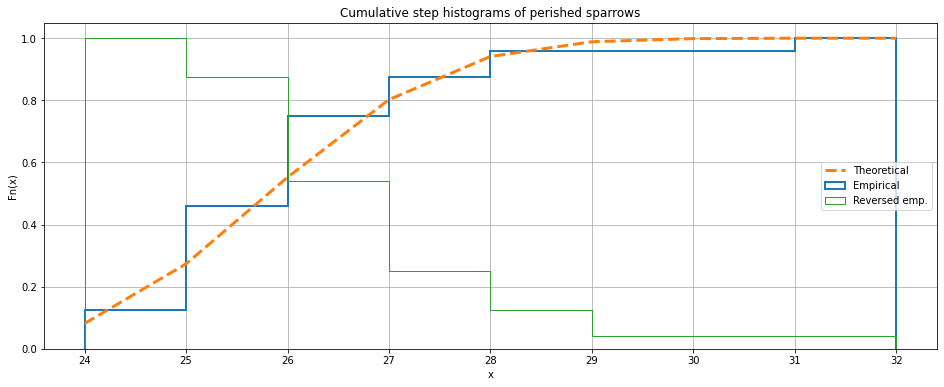

In [222]:
fig, ax = plt.subplots(figsize=(16, 6))

# plot the cumulative histogram
n, bins, patches = ax.hist(perished, bins_p,linewidth=2, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma_p)) *
     np.exp(-0.5 * (1 / sigma_p * (bins - mu_p))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, '--', linewidth=3, label='Theoretical')

# # Overlay a reversed cumulative histogram.
ax.hist(perished, bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms of perished sparrows')
ax.set_xlabel('x')
ax.set_ylabel('Fn(x)')

plt.show()


<hr \>



**3)  (3pts)  For  each  of  the  observed  parts  separately,  find  the  most  similar  distribution:Estimate the parameters of the normal, exponential and uniform distribution. Insert the corresponding densities with estimated parameters into the plot of the histogram. Discuss which of them fits the data best.**

**4)  (1pt) For each of the groups, generate a random sample of 100 observations from thedistribution you have chosen in the previous part, with parameters estimated from thedata.  Compare the histogram of the simulated values with the original data.**

#### Group 1. - Survived Sparrows

Probability density for this normal distribution is as figure:

$$ p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} } $$

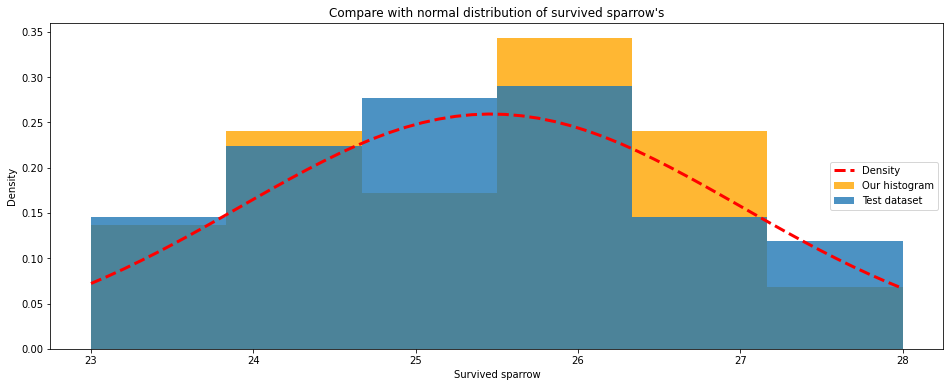

In [338]:
plt.figure(figsize=(16,6))
plt.title("Compare with normal distribution of survived sparrow's")
plt.ylabel('Density')
plt.xlabel('Survived sparrow')

n, bins, patches = plt.hist(survived, bins_s, density=1, color="orange",alpha=0.8, label='Our histogram')

# approximation of two params "mu_s" and "survived_var" in normal distribution
# mu_s is expected value of survived sparrows 
# survived_var is variance of survived sparrows 

# numpy.random.normal(loc=0.0, scale=1.0, size=None) [2]
rand_val = np.random.normal(mu_s, survived_var, size=100)
n, bins, patches = plt.hist(rand_val, bins_s, density=1,alpha=0.8, label='Test dataset')

# Density
plt.plot(density_x_s, norm.pdf(density_x_s, loc=mu_s, scale=survived_var), '--', linewidth=3, 
         color='red', label='Density')

plt.legend(loc='right')
plt.show()



Exponential distribution probability density function is:

$$ {\displaystyle f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}} $$

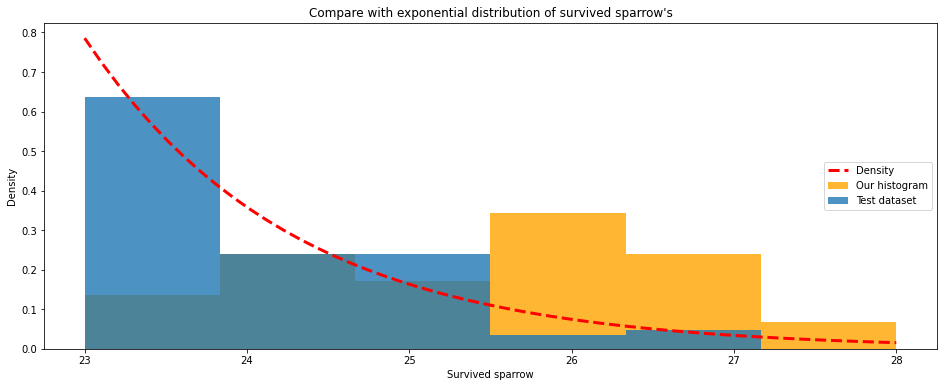

In [331]:
plt.figure(figsize=(16,6))
plt.title("Compare with exponential distribution of survived sparrow's")
plt.ylabel('Density')
plt.xlabel('Survived sparrow')

n, bins, patches = plt.hist(survived, bins_s, density=1, color="orange",alpha=0.8, label='Our histogram')

# approximation of two params "lambda_s" and "mu" in exponential distribution
lambda_s = 1 / survived_exp
mu = 1 / lambda_s * 0.05

# numpy.random.exponential(scale=1.0, size=None) [3]
rand_val = np.random.exponential(mu, size=100) + (--survived_min)

filtered_arr = []
for value in rand_val:
    if value <= survived_max:
        filtered_arr.append(value)

# Exponential distribution with random set        
n, bins, patches = plt.hist(filtered_arr, bins_s, density=1,alpha=0.8, label='Test dataset')

# Density
plt.plot(density_x_s, expon.pdf(density_x_s, loc=survived_min, scale=mu), '--', linewidth=3, 
         color='red', label='Density')

plt.legend(loc='right')
plt.show()


Probability of density in continuos uniform distribution is:

$$ f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}} $$


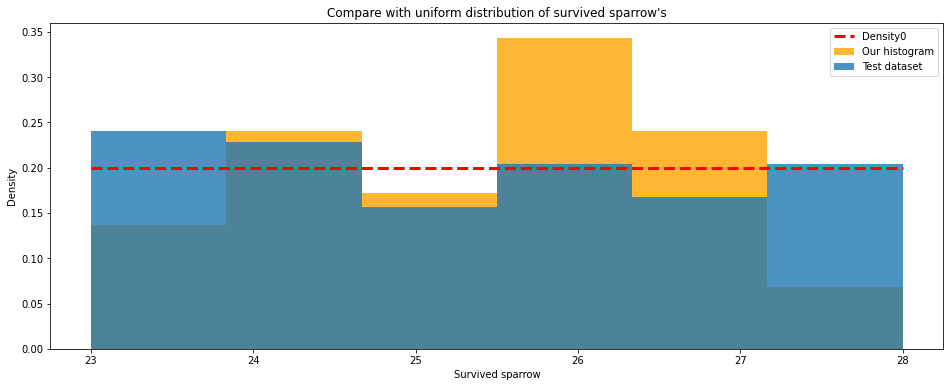

In [339]:
plt.figure(figsize=(16,6))
plt.title("Compare with uniform distribution of survived sparrow's")
plt.ylabel('Density')
plt.xlabel('Survived sparrow')

n, bins, patches = plt.hist(survived, bins_s, density=1, color="orange",alpha=0.8, label='Our histogram')

# approximation of two params a and b as maximum and minim from the set
# a == perished_min
# b == perished_max

rand_val = np.random.uniform(low=survived_min, high=survived_max, size=100)  
n, bins, patches = plt.hist(rand_val, bins_s, density=1,alpha=0.8, label='Test dataset')

# Density
plt.plot(density_x_s, uniform.pdf(density_x_s, loc=survived_min, scale=(survived_max - survived_min)), 
         '--', linewidth=3, color='red', label='Density0')

plt.legend(loc='upper right')
plt.show()

#### Summary of best predictions of group "survived sparrows"
<br>

| Rank | Type of distribution | Prediction of param no. 1. | Prediction of param no. 2. | 
|---:|:-------------|:-----------|:------|
| 1 | Normal Distribution function | EXpected value / survived mu | variance of survived | 
| 2 | Uniform Distribution function | survived min number | survived max number |
| 3 | Exponential Distribution function | lambda | mu |

<hr \>

#### Group 2. - Perished Sparrows

The Expectation is that the probability density for this distribution is as figure:

$$ p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} } $$

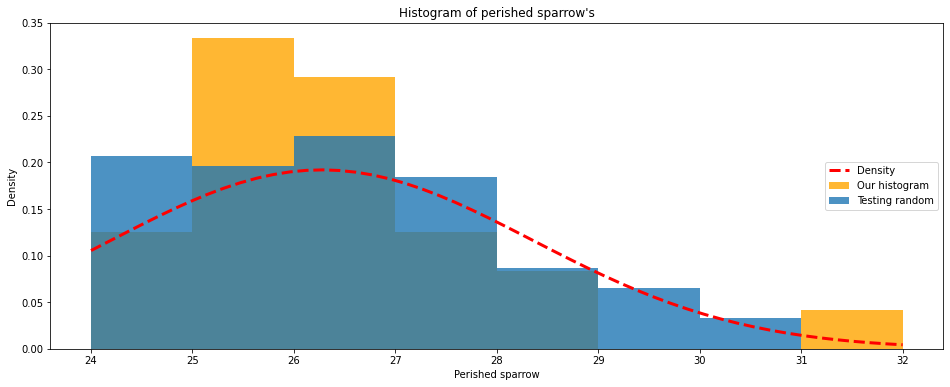

In [337]:
# linspace() -> Return evenly spaced numbers over a specified interval.[1] 
plt.figure(figsize=(16,6))
plt.title("Histogram of perished sparrow's")
plt.ylabel('Density')
plt.xlabel('Perished sparrow')

n, bins, patches = plt.hist(perished, bins_p, density=1, color="orange",alpha=0.8, label='Our histogram')

# approximation of two params "mu_p" and "perished_var" in normal distribution
# mu_p is expected value of perisher sparrows 
# perished_var is variance of perisher sparrows 

# numpy.random.normal(loc=0.0, scale=1.0, size=None) [2]
rand_val = np.random.normal(mu_p, perished_var, size=100)
n, bins, patches = plt.hist(rand_val, bins_p, density=1,alpha=0.8, label='Testing random')

# Density
plt.plot(density_x_p, norm.pdf(density_x_p, loc=mu_p, scale=perished_var), '--', linewidth=3, 
         color='red', label='Density')

plt.legend(loc='right')
plt.show()



Exponential distribution probability density function is:

$$ {\displaystyle f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}} $$

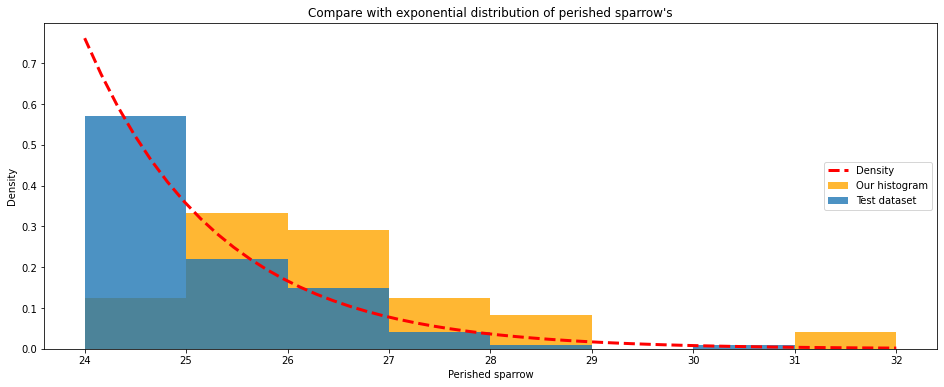

In [330]:
plt.figure(figsize=(16,6))
plt.title("Compare with exponential distribution of perished sparrow's")
plt.ylabel('Density')
plt.xlabel('Perished sparrow')

n, bins, patches = plt.hist(perished, bins_p, density=1, color="orange",alpha=0.8, label='Our histogram')

# approximation of two params "lambda_p" and "mu" in exponential distribution
lambda_p = 1 / perished_exp
mu = 1 / lambda_p * 0.05

# numpy.random.exponential(scale=1.0, size=None) [3]
rand_val = np.random.exponential(mu, size=100) + (--perished_min)

filtered_arr = []
for value in rand_val:
    if value <= perished_max:
        filtered_arr.append(value)

# Exponential distribution with random set        
n, bins, patches = plt.hist(filtered_arr, bins_p, density=1,alpha=0.8, label='Test dataset')

# Density
plt.plot(density_x_p, expon.pdf(density_x_p, loc=perished_min, scale=mu), '--', linewidth=3, 
         color='red', label='Density')

plt.legend(loc='right')
plt.show()


Probability of density in continuos uniform distribution is:

$$ f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}} $$


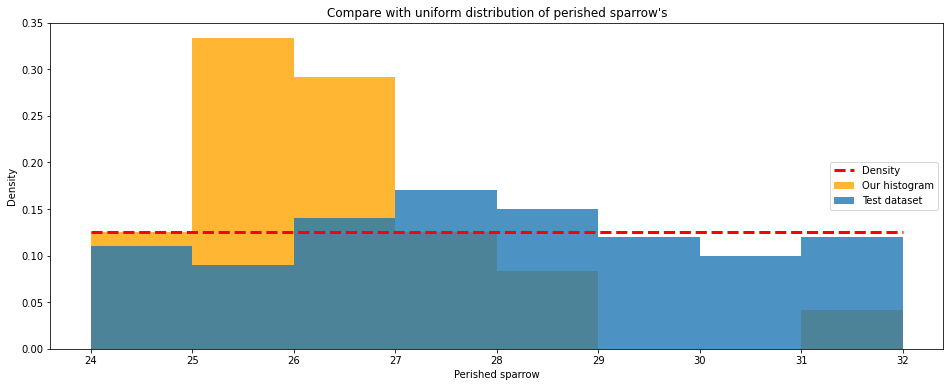

In [315]:
plt.figure(figsize=(16,6))
plt.title("Compare with uniform distribution of perished sparrow's")
plt.ylabel('Density')
plt.xlabel('Perished sparrow')

n, bins, patches = plt.hist(perished, bins_p, density=1, color="orange",alpha=0.8, label='Our histogram')

# approximation of two params a and b as maximum and minim from the set
# a == perished_min
# b == perished_max

rand_val = np.random.uniform(low=perished_min, high=perished_max, size=100)  
n, bins, patches = plt.hist(rand_val, bins_p, density=1,alpha=0.8, label='Test dataset')

# Density
plt.plot(density_x_p, uniform.pdf(density_x_p, loc=perished_min, scale=(perished_max - perished_min)), 
         '--', linewidth=3, color='red', label='Density')

plt.legend(loc='right')
plt.show()

#### Summary of best predictions of group "perished sparrows"
<br>


| Rank | Type of distribution | Prediction of param no. 1. | Prediction of param no. 2. | 
|---:|:-------------|:-----------|:------|
| 1 | Exponential Distribution function | lambda | mu |
| 2 | Normal Distribution function | EXpected value / perished mu | variance of perished | 
| 3 | Uniform Distribution function | perished min number | perished max number |

<hr \>

**5)  (1pt) For both parts separately, compute the two-sided confidence interval for the ex-pected value with confidence level 95%.**

<hr \>

[1] https://numpy.org/doc/stable/reference/generated/numpy.linspace.html <br>
[2] https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html <br>
[3] https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html
